In [1]:
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.time as astropy_time


from space_grond import Simulation

# Setup

we need to use the astropy unit system for everything

In [2]:
altitude = 600 * u.km

# the day the observations are supposed to occur
t0 = astropy_time.Time(54203, format="mjd")
t0.to_value("isot")

'2007-04-13T00:00:00.000'

starting longitude

In [8]:
"070413"[-2:]

'13'

In [4]:
u0 = 10 # in degress

# this is static for now
delay_time = 15 * u.minute


# Now make a simulation

In [ ]:
sim = Simulation.from_observation_file(
    "simu_inp.txt",
    altitude=altitude,
    t0=t0,
  
    u0=u0,
    delay_time=delay_time,
    limb_angle=28,
    sun_angle=10,
    moon_angle=10,
)

/Users/jburgess/coding/projects/space_grond/space_grond/grb.py:96: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 1d, A), array(float64, 1d, A))
  sun_sep = np.rad2deg(get_ang(grb_position, sun_pos[n]))


This creates a dictionary inside the sim with all the observations

In [10]:
grb_names = list(sim.observations.keys())

In [11]:
sim.observations[grb_names[0]]

Observation was NOT possible at 2007-04-13T07:06:11.000
Thus, we wait for 43.28657314629247 min and can observe for 44.88977955911821 min

In [7]:
sim.observations[grb_names[1]]

Observation started at 2007-04-13T07:22:25.000 
and will be observable for 34.06813627254493 min

In [14]:
sim.observations[grb_names[16]]

Observation started at 2007-04-13T23:35:14.000 
and will be observable for 39.278557114228434 min

## accessing traits

To access the traits of an observation, we have the following choices:


### an observation not seen at first

In [29]:


obs = sim.observations[grb_names[0]]
obs.observed_at_start

False

How long to wait from trigger + delay time?

In [30]:
obs.next_visible_time_from_now

<Quantity 43.28657315 min>

How long is it visible now?

In [31]:
obs.remaining_time

<Quantity 44.88977956 min>

### an observation that is seen instantly

In [36]:
obs = sim.observations[grb_names[1]]
obs.observed_at_start

True

How long is it visible now?

In [37]:
obs.time_left_to_observe

<Quantity 34.06813627 min>

In [38]:
obs.obs_is_too_short

False

### an observation that is seen instantly but for too little time

In [15]:
obs = sim.observations[grb_names[16]]

In [16]:
obs.time_left_to_observe

<Quantity 39.27855711 min>

In [17]:
obs.obs_is_too_short

False

How long we have to wait until the next observation (from the end of the current one!), and how long will that observation last?

In [42]:
print(obs.next_visible_time_from_now, obs.remaining_time)

51.30260521042086 min 45.69138276553108 min


## Going through everthing

Just an example of how to gather the variables

In [20]:
instant_obs_time = []

time_to_wait = []

for grb_name, obs in sim.observations.items():
    
    if obs.observed_at_start:
        
        instant_obs_time.append(obs.time_left_to_observe.value)
        
    elif (not obs.will_never_be_seen):
        
        time_to_wait.append(obs.next_visible_time_from_now.value)
    
    

<IPython.core.display.Javascript object>


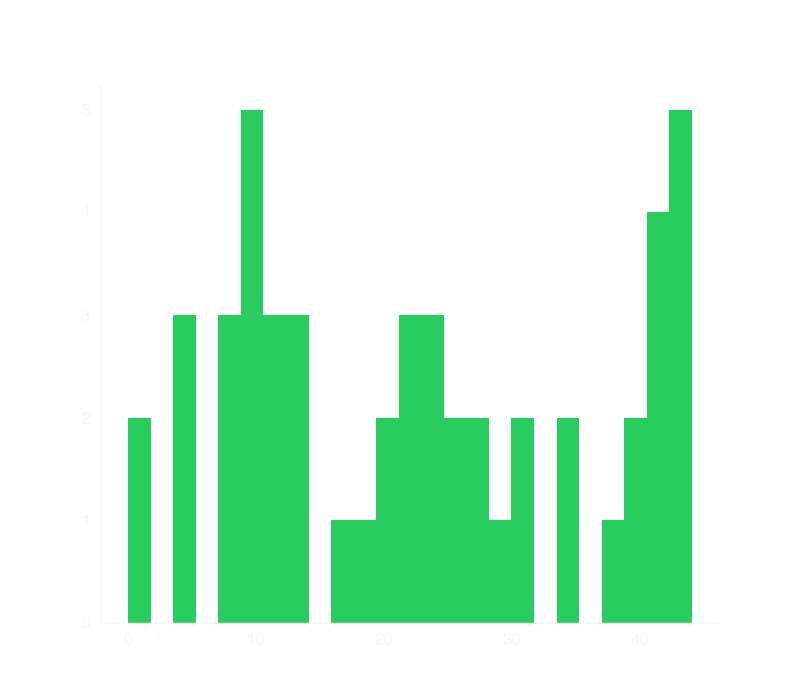

(array([2., 0., 3., 0., 3., 5., 3., 3., 0., 1., 1., 2., 3., 3., 2., 2., 1.,
        2., 0., 2., 0., 1., 2., 4., 5.]),
 array([ 0.        ,  1.76352705,  3.52705411,  5.29058116,  7.05410822,
         8.81763527, 10.58116232, 12.34468938, 14.10821643, 15.87174349,
        17.63527054, 19.3987976 , 21.16232465, 22.9258517 , 24.68937876,
        26.45290581, 28.21643287, 29.97995992, 31.74348697, 33.50701403,
        35.27054108, 37.03406814, 38.79759519, 40.56112224, 42.3246493 ,
        44.08817635]),
 <a list of 25 Patch objects>)

In [21]:
fig, ax = plt.subplots()

ax.hist(instant_obs_time)

<IPython.core.display.Javascript object>


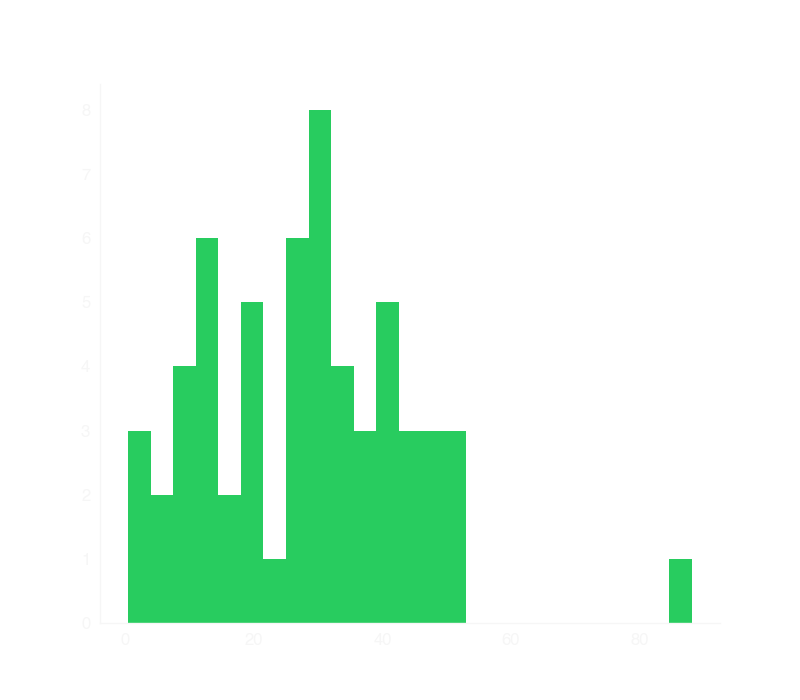

(array([3., 2., 4., 6., 2., 5., 1., 6., 8., 4., 3., 5., 3., 3., 3., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 0.4008016 ,  3.91182365,  7.42284569, 10.93386774, 14.44488978,
        17.95591182, 21.46693387, 24.97795591, 28.48897796, 32.        ,
        35.51102204, 39.02204409, 42.53306613, 46.04408818, 49.55511022,
        53.06613226, 56.57715431, 60.08817635, 63.5991984 , 67.11022044,
        70.62124248, 74.13226453, 77.64328657, 81.15430862, 84.66533066,
        88.17635271]),
 <a list of 25 Patch objects>)

In [22]:
fig, ax = plt.subplots()

ax.hist(time_to_wait)